<a href="https://colab.research.google.com/github/Chefiai/1P/blob/main/ImageCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
from tensorflow.keras import utils as np_utils
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
print("Nb images entrainement=" +str(x_train.shape))
print("Nb images test="+str(x_test.shape))

Nb images entrainement=(60000, 28, 28)
Nb images test=(10000, 28, 28)


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train[0]

5

In [8]:
x_train = np.pad(x_train,((0,0),(2,2),(2,2)), 'constant',constant_values=0)
x_test = np.pad(x_test,((0,0),(2,2),(2,2)), 'constant',constant_values=0)

In [9]:
x_train.shape

(60000, 32, 32)

In [10]:
x_train=x_train.reshape(x_train.shape[0],32, 32,1)
x_test=x_test.reshape(x_test.shape[0],32, 32,1)

In [11]:
x_train.shape

(60000, 32, 32, 1)

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
print(y_train.shape)
y_test = np_utils.to_categorical(y_test, 10)

print(y_train)


(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


CNN to be re-see

Apprentissage


In [13]:
from keras.models import Sequential
from keras import models, layers
import keras

model = Sequential()

# Convolution 1
model.add(layers.Conv2D(6, kernel_size=(5,5),     # 6 filtres de taille 5x5
                        strides=(1,1),            # Déplacement du filtre pixel par pixel
                        activation='tanh',        # Fonction d'activation
                        input_shape=(32,32,1)))   #Taille de l'image entrée

# Pooling 1
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# Convolution 2
model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh'))

# Pooling 2
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# Convolution 3
model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh'))

## Mise à plat

# Flatten
model.add(layers.Flatten())

# Couche cachée
model.add(layers.Dense(84, activation='sigmoid'))

# Couche de sortie
model.add(layers.Dense(10,activation='softmax'))

In [14]:
# loss = fonction de coût
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD',        # On utilise la descente de gradient
              metrics="accuracy")     # Pourcentage de justesse (CA sur Orange)

In [15]:
hist = model.fit(x=x_train,
                 y=y_train,
                 epochs=10,
                 batch_size=128,
                 validation_data=(x_test, y_test),
                 verbose=1)

# Sauvegarde du modèle
model.save("lenet5.h5")

# Sauvegarde de l'historique
import pickle
with open('historique.hist', 'wb') as file_pi:
  pickle.dump(hist.history, file_pi)

Epoch 1/10
469/469 [==============================] - 31s 64ms/step - loss: 2.2051 - accuracy: 0.3639 - val_loss: 2.0009 - val_accuracy: 0.5583
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 1.6289 - accuracy: 0.6425 - val_loss: 1.2551 - val_accuracy: 0.7364
Epoch 3/10
469/469 [==============================] - 28s 60ms/step - loss: 1.0367 - accuracy: 0.7737 - val_loss: 0.8480 - val_accuracy: 0.8107
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 0.7536 - accuracy: 0.8259 - val_loss: 0.6528 - val_accuracy: 0.8460
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 0.6080 - accuracy: 0.8515 - val_loss: 0.5423 - val_accuracy: 0.8679
Epoch 6/10
469/469 [==============================] - 27s 59ms/step - loss: 0.5197 - accuracy: 0.8694 - val_loss: 0.4710 - val_accuracy: 0.8828
Epoch 7/10
469/469 [==============================] - 29s 61ms/step - loss: 0.4604 - accuracy: 0.8816 - val_loss: 0.4209 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


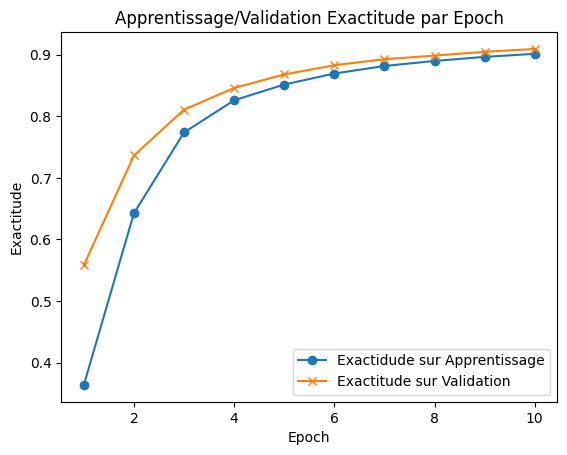

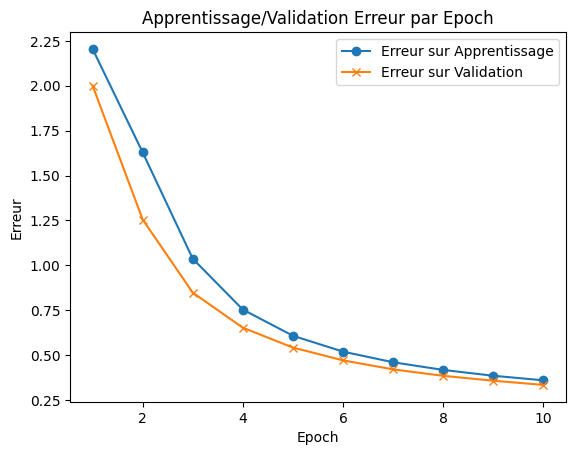

In [16]:
with open('historique.hist', 'rb') as f:
  historique = pickle.load(f)

  f, ax = plt.subplots()
  ax.plot([None] + historique["accuracy"], "o-")
  ax.plot([None] + historique["val_accuracy"], "x-")

  ax.legend(["Exactidude sur Apprentissage", 'Exactitude sur Validation'], loc = 0)
  ax.set_title("Apprentissage/Validation Exactitude par Epoch")
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Exactitude')

  f, ax = plt.subplots()
  ax.plot([None] + historique["loss"], "o-")
  ax.plot([None] + historique["val_loss"], "x-")

  ax.legend(["Erreur sur Apprentissage", 'Erreur sur Validation'], loc = 0)
  ax.set_title("Apprentissage/Validation Erreur par Epoch")
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Erreur')

In [39]:
image = x_test[100]
print(image.shape)


(32, 32, 1)


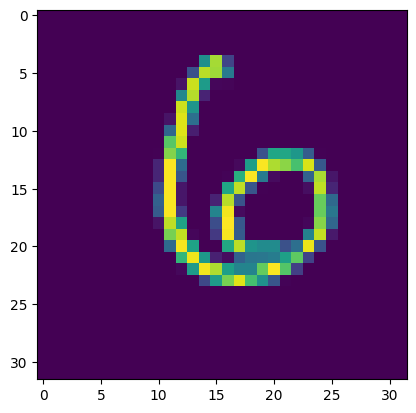

In [40]:
display = image.reshape((32,32))
plt.imshow(display)

In [41]:
image = image.reshape(1,32,32,1)
prediction = model.predict(image)
print(prediction)

1/1 [==============================] - 0s 37ms/step
[[3.3596768e-03 9.8954921e-04 6.0936153e-02 4.6936996e-04 2.3834238e-02
  3.6556225e-03 9.0379739e-01 1.6012942e-04 2.5008845e-03 2.9695252e-04]]


In [42]:
result = np.where(prediction==np.amax(prediction))
print("c'est le chiffre :"+str(result[1][0]))

c'est le chiffre :6
